In [1]:
# https://mxnet.apache.org/api/python/docs/api/gluon/index.html
import sys
sys.path.append("/workspace/server")
import warnings

from thera.python.mxnet import mxnet as mx
warnings.filterwarnings('ignore')

import random
import numpy as np
import mxnet as mx
from mxnet import gluon
import gluonnlp as nlp
# https://gluon-nlp.mxnet.io/master/examples/word_embedding/word_embedding.html
import re

In [2]:
net = gluon.nn.Sequential()
num_outputs=  10
# When instantiated, Sequential stores a chain of neural network layers.
# Once presented with data, Sequential executes each layer in turn, using
# the output of one layer as the input for the next
with net.name_scope():
    net.add(gluon.nn.Dense(64, activation="relu")) # 1st layer (256 nodes)
    net.add(gluon.nn.Dense(64, activation="relu")) # 2nd hidden layer
    net.add(gluon.nn.Dense(num_outputs))

# Model trying to learn iris



In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
iris = datasets.load_iris()

In [4]:
data = iris.data
labels = iris.target

In [5]:
data.shape, labels.shape

((150, 4), (150,))

Text(0, 0.5, 'Sepal width')

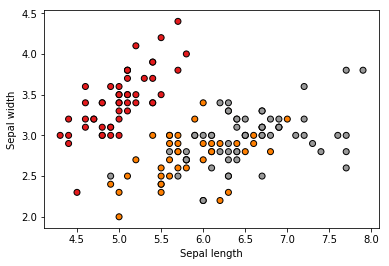

In [6]:
# Plot the training points
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


[]

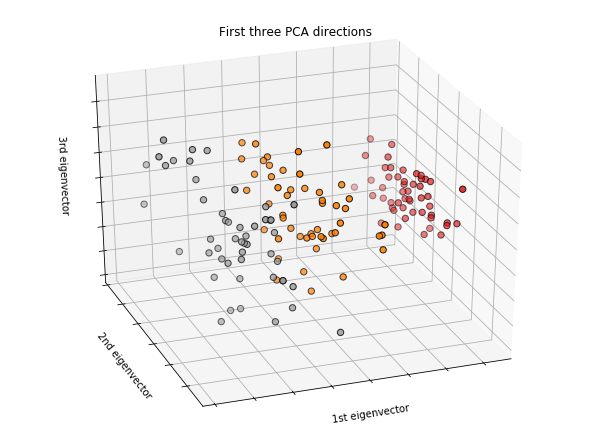

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 0.92, 'First three PCA directions')

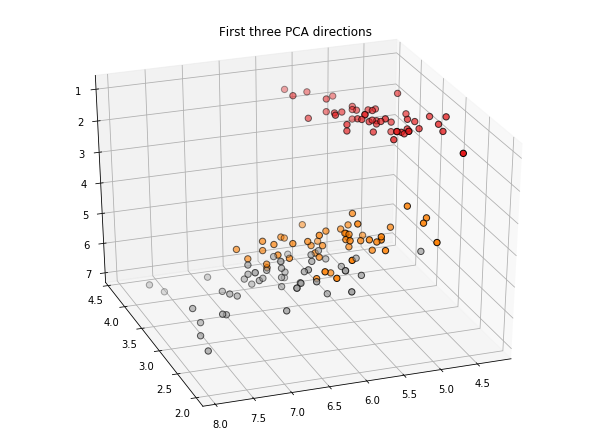

In [8]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")


In [9]:
# Learning

In [10]:
from mxnet import nd
from mxnet.gluon import nn


# Uncomment the following line if matplotlib is not installed.
# !pip install matplotlib

from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
import time



In [57]:
net = nn.Sequential()
# Add a sequence of layers.
net.add(
        nn.Dense(64, activation="relu"),
        nn.Dense(32, activation="relu"),
        nn.Dense(1))
net

Sequential(
  (0): Dense(None -> 64, Activation(relu))
  (1): Dense(None -> 32, Activation(relu))
  (2): Dense(None -> 1, linear)
)

# Preprocessing

In [100]:
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0) 

In [101]:
shuffled_data_set = []
for element, label in zip(data, labels):
    shuffled_data_set.append([*element, label])
np.random.shuffle(shuffled_data_set)
shuffled_data_set = np.array(shuffled_data_set)
shuffled_data_set

array([[ 6.86617933e-02, -1.31979479e-01,  2.51221427e-01,
         3.95774101e-01,  1.00000000e+00],
       [ 1.64384411e+00, -1.31979479e-01,  1.16062026e+00,
         5.27406285e-01,  2.00000000e+00],
       [-7.79513300e-01,  7.88807586e-01, -1.34022653e+00,
        -1.31544430e+00,  0.00000000e+00],
       [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
         5.27406285e-01,  1.00000000e+00],
       [-9.00681170e-01,  1.70959465e+00, -1.22655167e+00,
        -1.31544430e+00,  0.00000000e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00,  0.00000000e+00],
       [-1.50652052e+00,  3.28414053e-01, -1.34022653e+00,
        -1.31544430e+00,  0.00000000e+00],
       [-9.00681170e-01,  5.58610819e-01, -1.16971425e+00,
        -9.20547742e-01,  0.00000000e+00],
       [ 1.15917263e+00, -1.31979479e-01,  9.90107977e-01,
         1.18556721e+00,  2.00000000e+00],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
        -1.44707648e+00

# Training 

In [102]:
shuffled_data_set[:int(0.8 * data.shape[0])]

array([[ 6.86617933e-02, -1.31979479e-01,  2.51221427e-01,
         3.95774101e-01,  1.00000000e+00],
       [ 1.64384411e+00, -1.31979479e-01,  1.16062026e+00,
         5.27406285e-01,  2.00000000e+00],
       [-7.79513300e-01,  7.88807586e-01, -1.34022653e+00,
        -1.31544430e+00,  0.00000000e+00],
       [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
         5.27406285e-01,  1.00000000e+00],
       [-9.00681170e-01,  1.70959465e+00, -1.22655167e+00,
        -1.31544430e+00,  0.00000000e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00,  0.00000000e+00],
       [-1.50652052e+00,  3.28414053e-01, -1.34022653e+00,
        -1.31544430e+00,  0.00000000e+00],
       [-9.00681170e-01,  5.58610819e-01, -1.16971425e+00,
        -9.20547742e-01,  0.00000000e+00],
       [ 1.15917263e+00, -1.31979479e-01,  9.90107977e-01,
         1.18556721e+00,  2.00000000e+00],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
        -1.44707648e+00

In [103]:

training_data = np.array(shuffled_data_set[:int(0.8 * data.shape[0])])
testing_data = np.array(shuffled_data_set[int(0.8 * data.shape[0]):])
training_data.shape, testing_data.shape

((120, 5), (30, 5))

In [104]:
training_data[0]

array([ 0.06866179, -0.13197948,  0.25122143,  0.3957741 ,  1.        ])

In [105]:
batch_size = 4
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
train_data = gluon.data.DataLoader(
    training_data, batch_size=batch_size, shuffle=True, num_workers=4)
test_data = gluon.data.DataLoader(
    testing_data, batch_size=batch_size, shuffle=True, num_workers=4)

In [106]:

def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output - label.astype('float32')).mean().asscalar()



In [112]:
net = nn.Sequential()
# Add a sequence of layers.
net.add(
        nn.Dense(16, activation="relu"),
        nn.Dense(8, activation="relu"),
        nn.Dense(1))
net
net.initialize()
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': 0.005})
for epoch in range(20):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time.time()
    for train_sample in train_data:
        sample_data = train_sample[:, :3]
        sample_label = train_sample[:, 4]
        sample_label_one_h = mx.nd.zeros((3))
        sample_label_one_h[sample_label] = 1
        with autograd.record():
            sample_data = mx.nd.Cast(sample_data, dtype=np.float32)
            sample_label = mx.nd.Cast(sample_label, dtype=np.float32)
            output = net(sample_data)
            loss = gluon.loss.L1Loss()(output, sample_label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)
    print("Epoch {}: loss {}".format(epoch, train_loss/len(train_data)))

Epoch 0: loss 0.868638826906681
Epoch 1: loss 0.42830677653352417
Epoch 2: loss 0.3060726282497247
Epoch 3: loss 0.20323764555117427
Epoch 4: loss 0.19341460814078648
Epoch 5: loss 0.18767695265511672
Epoch 6: loss 0.17417668231452504
Epoch 7: loss 0.17451337616269788
Epoch 8: loss 0.16761374570196494
Epoch 9: loss 0.16497201484938462
Epoch 10: loss 0.16059473597755033
Epoch 11: loss 0.17112504160031677
Epoch 12: loss 0.16813710806891322
Epoch 13: loss 0.1616460610801975
Epoch 14: loss 0.16527068763971328
Epoch 15: loss 0.15730765205807984
Epoch 16: loss 0.15773853898669282
Epoch 17: loss 0.15435668240922193
Epoch 18: loss 0.1488799064109723
Epoch 19: loss 0.14346194686368108
